### 08_CNN_mnist
preds = model.predict_classes(x_test)
probs = model.predict_proba(x_test_digit, batch_size=1)  

In [1]:
import os, sys
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.datasets import mnist
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

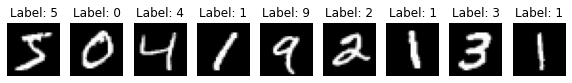

In [2]:
# 載入 MNIST 資料集, 如果需要, 會自行下載
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
plt.figure(figsize = (10, 1))
os.makedirs("./images/", exist_ok=True)
for i in range(0,9):
    plt.subplot(1,9,(i+1))
    plt.imshow(X_train[i], cmap="gray")
    plt.title("Label: " + str(Y_train[i]))
    plt.axis("off")
    name = "./images/digit"+str(i)+".npy"
    np.save(name,X_train[i])
plt.subplots_adjust(hspace = .5)
# 顯示數字圖片
plt.show()    

In [3]:
seed = 7
np.random.seed(seed)
# 將 28*28 圖片轉換成 784 的向量
input_dim = X_train.shape[1]*X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], input_dim).astype("float32")
X_test = X_test.reshape(X_test.shape[0], 28*28).astype("float32")
print("X_train Shape: ", X_train.shape)
print("X_test Shape: ", X_test.shape)
# 執行正規化
X_train = X_train / 255
X_test = X_test / 255
# One-hot編碼
origin = Y_train[0]
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)
print("Y_train Shape: ", Y_train.shape)
print(origin)
print(Y_train[0])

X_train Shape:  (60000, 784)
X_test Shape:  (10000, 784)
Y_train Shape:  (60000, 10)
5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [8]:
from tensorflow.keras.layers import Dropout
# 定義模型
input_dim = X_train.shape[1]
output_dim = Y_train.shape[1]
model = Sequential()
model.add(Dense(256, input_dim=input_dim, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(256, activation="relu"))
model.add(Dense(output_dim, activation="softmax"))
model.summary()
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history = model.fit(X_train, Y_train, validation_split=0.2, epochs=10, batch_size=128, verbose=0)
# 評估模型
print("\nTesting ...")
loss, accuracy = model.evaluate(X_train, Y_train, verbose=0)
print("訓練資料集的準確度 = {:.2f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, Y_test, verbose=0)
print("測試資料集的準確度 = {:.2f}".format(accuracy))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total params: 269,322
Trainable params: 269,322
Non-trainable params: 0
_________________________________________________________________

Testing ...
訓練資料集的準確度 = 1.00
測試資料集的準確度 = 0.98


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


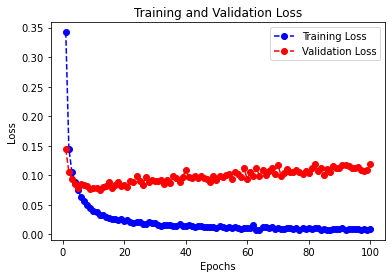

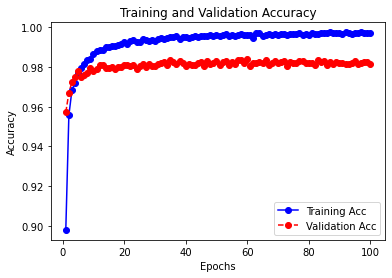

In [9]:
print(history.history.keys())
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss)+1)
plt.plot(epochs, loss, "bo--", label="Training Loss")
plt.plot(epochs, val_loss, "ro--", label="Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

# 顯示訓練和驗證準確度
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo-", label="Training Acc")
plt.plot(epochs, val_acc, "ro--", label="Validation Acc")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# 將圖片轉換成 4D 張量

(60000, 28, 28)
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        12832     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1568)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 12

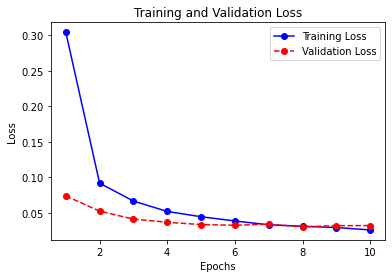

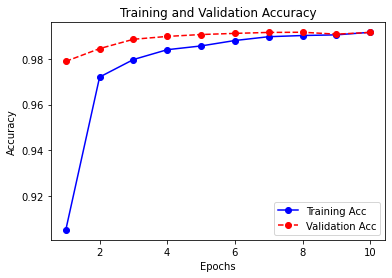

In [11]:
# 載入資料集
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
# 將圖片轉換成 4D 張量
print(X_train.shape)
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype("float32")
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype("float32")
# 執行正規化
X_train = X_train / 255
X_test = X_test / 255
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)

model = Sequential()
model.add(Conv2D(16, kernel_size=(5,5), padding="same", input_shape=(28,28,1), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32, kernel_size=(5,5), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(Y_train.shape[1], activation="softmax"))
model.summary()
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history = model.fit(X_train, Y_train, validation_split=0.2, epochs=10, batch_size=128, verbose=0)
# 評估模型
print("\nTesting ...")
loss, accuracy = model.evaluate(X_train, Y_train, verbose=0)
print("訓練資料集的準確度 = {:.2f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, Y_test, verbose=0)
print("測試資料集的準確度 = {:.2f}".format(accuracy))
# 儲存Keras模型
print("Saving Model: mnist.h5 ...")
model.save(os.path.join(".","model_data","mnist_08.h5"))

# 顯示訓練和驗證損失
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss)+1)
plt.plot(epochs, loss, "bo-", label="Training Loss")
plt.plot(epochs, val_loss, "ro--", label="Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()
# 顯示訓練和驗證準確度
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo-", label="Training Acc")
plt.plot(epochs, val_acc, "ro--", label="Validation Acc")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# 讀取模型

In [18]:
l_model = Sequential()
l_model = load_model(os.path.join(".","model_data","mnist_08.h5"))
l_model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
print("Testing ...")
loss, accuracy = l_model.evaluate(X_test, Y_test, verbose=0)
print("測試資料集的準確度 = {:.2f}".format(accuracy))

Testing ...
測試資料集的準確度 = 0.99


In [31]:
# 計算分類的預測值
print("\nPredicting ...")
labels = [one_label.tolist().index(1) for one_label in Y_test]
# 將 List 轉成 np 陣列
labels = np.array(labels) 
Y_pred = l_model.predict_classes(X_test)
# 顯示混淆矩陣
tb = pd.crosstab(labels.astype(int), Y_pred.astype(int), rownames=["label"], colnames=["predict"])
print(tb)


Predicting ...
predict    0     1     2     3    4    5    6     7    8    9
label                                                        
0        979     0     0     0    0    0    0     1    0    0
1          0  1134     0     0    0    0    1     0    0    0
2          2     1  1027     0    0    0    0     1    1    0
3          0     0     2  1005    0    1    0     0    2    0
4          0     0     0     0  981    0    0     0    0    1
5          2     0     0     7    0  880    2     0    0    1
6          3     2     0     0    1    1  951     0    0    0
7          0     3     7     0    1    0    0  1015    1    1
8          3     1     2     2    2    2    1     2  957    2
9          0     3     0     0   10    3    0     3    1  989


Predicting ...
[[0.10076287 0.11216273 0.09718663 0.09210733 0.09323374 0.09816711
  0.09535291 0.09898764 0.11517785 0.09686121]]


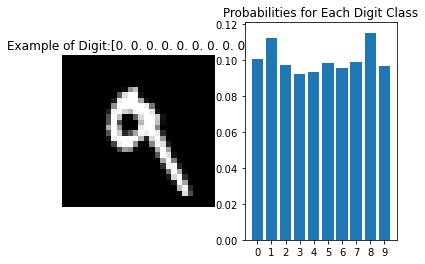

In [32]:
### model.predict_proba
i = 7
digit = X_test[i].reshape(28, 28)
# 將圖片轉換成 4D 張量
X_test_digit = X_test[i].reshape(1, 28, 28, 1).astype("float32")
# 因為是固定範圍, 所以執行正規化, 從 0-255 至 0-1
X_test_digit = X_test_digit / 255
# 建立Keras的Sequential模型
model = Sequential()
model = load_model(os.path.join(".","model_data","mnist_08.h5"))
# 編譯模型
model.compile(loss="categorical_crossentropy", optimizer="adam",
              metrics=["accuracy"])
# 繪出圖表的預測結果
plt.figure()
plt.subplot(1,2,1)
plt.title("Example of Digit:" + str(Y_test[i]))
plt.imshow(digit, cmap="gray")
plt.axis("off")
# 預測結果的機率
print("Predicting ...")
probs = model.predict_proba(X_test_digit, batch_size=1)
print(probs)
plt.subplot(1,2,2)
plt.title("Probabilities for Each Digit Class")
plt.bar(np.arange(10), probs.reshape(10), align="center")
plt.xticks(np.arange(10),np.arange(10).astype(str))
plt.show()

Predicting ...
     label  predict
340      5        3
495      8        0
582      8        2
659      2        1
691      8        4
Index:  9009


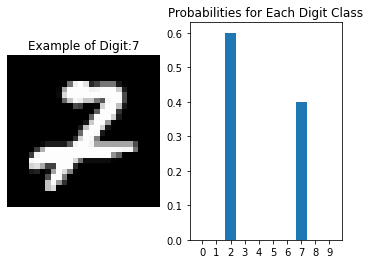

In [33]:
# 載入資料集
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
# 將圖片轉換成 4D 張量
X_test_bk = X_test.copy()   # 備份 X_test 測試資料集
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype("float32")
# 因為是固定範圍, 所以執行正規化, 從 0-255 至 0-1
X_test = X_test / 255
# 建立Keras的Sequential模型
model = Sequential()
model = load_model(os.path.join(".","model_data","mnist_08.h5"))
# 編譯模型
model.compile(loss="categorical_crossentropy", optimizer="adam",
              metrics=["accuracy"])
# 測試資料集的分類和機率的預測值
print("Predicting ...")
Y_pred = model.predict_classes(X_test)  # 分類
Y_probs = model.predict_proba(X_test)   # 機率
# 建立分類錯誤的 DataFrame 物件
df = pd.DataFrame({"label":Y_test, "predict":Y_pred})
df = df[Y_test!=Y_pred]  # 篩選出分類錯誤的資料
print(df.head())
#df.head().to_html("Ch8_4b.html")
# 隨機選 1 個錯誤分類的數字索引
i = df.sample(n=1).index.values.astype(int)[0]
print("Index: ", i)
digit = X_test_bk[i].reshape(28, 28) 
# 繪出圖表的預測結果
plt.figure()
plt.subplot(1,2,1)
plt.title("Example of Digit:" + str(Y_test[i]))
plt.imshow(digit, cmap="gray")
plt.axis("off")
plt.subplot(1,2,2)
plt.title("Probabilities for Each Digit Class")
plt.bar(np.arange(10), Y_probs[i].reshape(10), align="center")
plt.xticks(np.arange(10),np.arange(10).astype(str))
plt.show()